In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
sdf = pd.read_csv("salary.csv")
sdf

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
sdf.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [4]:
sdf['workclass'].isnull().sum()

0

In [5]:
sdf['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

## encoding categorical variables

In [6]:
#Salary: <=50K is 0, >50K is 1
sdf['salary'] = sdf['salary'].replace([' <=50K', ' >50K'],[0,1])

#Workclass: state-gov = 0, self emp not inc = 1, private = 2, federal gov = 3, local gov = 4, ? = 5, self emp inc = 6, without pay = 7, never worked = 8
sdf['workclass'] = sdf['workclass'].replace([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'],[0,1,2,3,4,5,6,7,8])

# Education: ' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',' Some-college', ' Assoc-acdm', 
#  ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
#        ' Preschool', ' 12th'

sdf['education'] = sdf['education'].replace([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'],[1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0])

# sdf['education'] = sdf['education'].replace([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
#        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
#        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
#        ' Preschool', ' 12th'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


# Marital status: [' Never-married', ' Married-civ-spouse', ' Divorced',
       # ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       # ' Widowed']
sdf['marital-status'] = sdf['marital-status'].replace([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'],[0,1,2,3,4,5,6])
# occupation: ' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       # ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       # ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       # ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       # ' Priv-house-serv'
sdf['occupation'] = sdf['occupation'].replace([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

# relationship: ' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative'
sdf['relationship'] = sdf['relationship'].replace([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'],[0,1,2,3,4,5])

#race: ' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other'
sdf['race'] = sdf['race'].replace([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'],[0,1,2,3,4])

sdf['sex'] = sdf['sex'].replace([' Male', ' Female'],[0,1])

# native country: ' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
#        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
#        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
#        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
#        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
#        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
#        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
#        ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
#        ' Ireland', ' Hungary', ' Holand-Netherlands'

sdf['native-country'] = sdf['native-country'].replace([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
        20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41])
                                                      
sdf

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,77516,1,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,1,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,0,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,0,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,1,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,0,12,1,10,2,0,1,0,0,38,0,0
32557,40,2,154374,0,9,1,9,1,0,0,0,0,40,0,1
32558,58,2,151910,0,9,6,0,4,0,1,0,0,40,0,0
32559,22,2,201490,0,9,0,0,3,0,0,0,0,20,0,0


In [7]:
# sdf = sdf.loc[sdf["hours-per-week"] == 40]
# sdf

In [8]:
# sdf['education'] = sdf['education'].replace([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
#        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
#        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
#        ' Preschool', ' 12th'],[1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0])

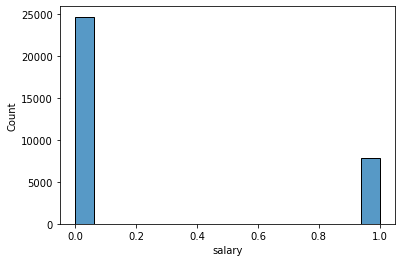

In [33]:
sns.histplot(sdf.salary)
plt.savefig("salary_before")

## Balance Salary Class

In [10]:
df_for_training_grouped = sdf.groupby("salary")
df_for_training_grouped.groups.values()
frames_of_groups = [x.sample(df_for_training_grouped.size().min()) for y, x in df_for_training_grouped]
new_sdf = pd.concat(frames_of_groups)


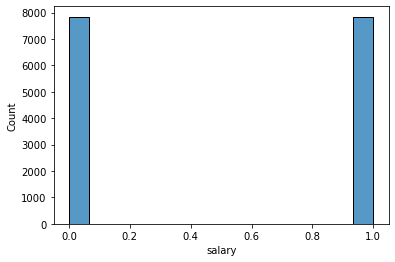

In [34]:
sns.histplot(new_sdf.salary)
plt.savefig("salary_aftersampling")

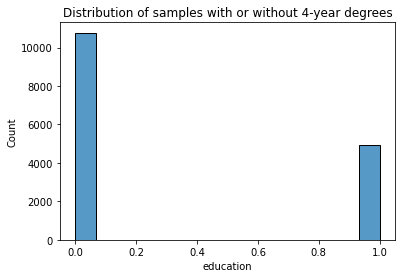

In [36]:
sns.histplot(new_sdf.education)
plt.title("Distribution of samples with or without 4-year degrees")
plt.savefig("education_distribution")

<AxesSubplot:xlabel='age', ylabel='salary'>

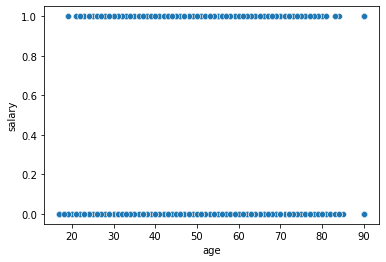

In [13]:
sns.scatterplot(x=new_sdf.age, y=new_sdf.salary)

<AxesSubplot:xlabel='education', ylabel='age'>

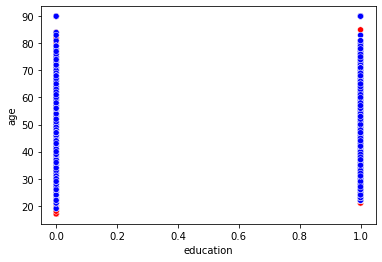

In [14]:
color = ['r' if  salary == 0 else 'b' for salary in new_sdf.salary]
# plt.scatter(df.x1, df.x2, c=color, s=10)
sns.scatterplot(data=sdf, x=new_sdf.education, y=new_sdf.age, c= color)

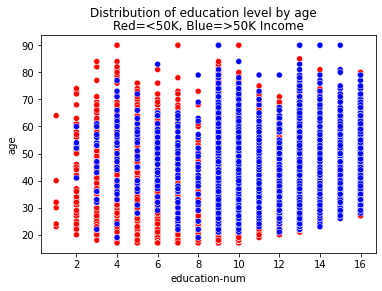

In [44]:
color = ['r' if  salary == 0 else 'b' for salary in new_sdf.salary]
# plt.scatter(df.x1, df.x2, c=color, s=10)
sns.scatterplot(data=sdf, x=new_sdf['education-num'], y=new_sdf.age, c= color)
plt.suptitle("Distribution of education level by age")
plt.title("Red=<50K, Blue=>50K Income")
plt.savefig('ed_lvl_age')

<AxesSubplot:xlabel='education', ylabel='hours-per-week'>

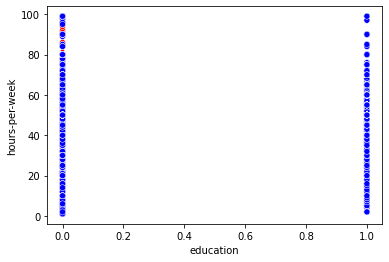

In [16]:
color = ['r' if  salary == 0 else 'b' for salary in new_sdf.salary]
# plt.scatter(df.x1, df.x2, c=color, s=10)
sns.scatterplot(data=sdf, x=new_sdf.education, y=new_sdf['hours-per-week'], c= color)

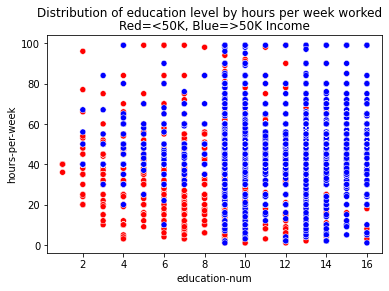

In [45]:
color = ['r' if  salary == 0 else 'b' for salary in new_sdf.salary]
# plt.scatter(df.x1, df.x2, c=color, s=10)
sns.scatterplot(data=sdf, x=new_sdf['education-num'], y=new_sdf['hours-per-week'], c= color)

plt.title("Red=<50K, Blue=>50K Income")
plt.suptitle("Distribution of education level by hours per week worked")
plt.savefig('ed_lvl_hoursper')

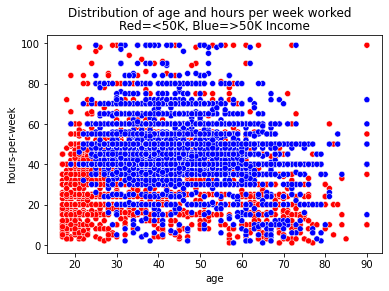

In [46]:
color = ['r' if  salary == 0 else 'b' for salary in new_sdf.salary]
# plt.scatter(df.x1, df.x2, c=color, s=10)
sns.scatterplot(data=sdf, x=new_sdf['age'], y=new_sdf['hours-per-week'], c= color)

plt.title("Red=<50K, Blue=>50K Income")
plt.suptitle("Distribution of age and hours per week worked")
plt.savefig('age_hoursper')

In [19]:
# X = sdf[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
#        'marital-status', 'occupation', 'relationship', 'race', 'sex',
#        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
# y = sdf.salary

# clf = svm.SVC(kernel='linear')
# clf.fit(X, y)

# y_pred = clf.predict(X)
# p,r,f,s = precision_recall_fscore_support(y, y_pred)
# display('precision = {}'.format(p))
# display('recall = {}'.format(r))
# display('f-score = {}'.format(f))



In [20]:
print(len(new_sdf))

15682


# Model Testing

In [21]:
X = new_sdf[['education-num', 'age', 'hours-per-week']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='linear', C=0.1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 


Score:  0.7202869669190912
CV average score: 0.72
[[1101  460]
 [ 415 1161]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1561
           1       0.72      0.74      0.73      1576

    accuracy                           0.72      3137
   macro avg       0.72      0.72      0.72      3137
weighted avg       0.72      0.72      0.72      3137



In [22]:
X = new_sdf[['age']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='linear', C=0.1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.6381028298126744
CV average score: 0.64
[[ 951  577]
 [ 508 1101]]
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1528
           1       0.66      0.68      0.67      1609

    accuracy                           0.65      3137
   macro avg       0.65      0.65      0.65      3137
weighted avg       0.65      0.65      0.65      3137



In [23]:
X = new_sdf[['hours-per-week']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='linear', C=0.1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.6266241530490235
CV average score: 0.63
[[1221  333]
 [ 811  772]]
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      1554
           1       0.70      0.49      0.57      1583

    accuracy                           0.64      3137
   macro avg       0.65      0.64      0.63      3137
weighted avg       0.65      0.64      0.63      3137



In [24]:
X = new_sdf[['education']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='linear', C=0.1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.6489438023116779
CV average score: 0.65
[[1287  263]
 [ 878  709]]
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      1550
           1       0.73      0.45      0.55      1587

    accuracy                           0.64      3137
   macro avg       0.66      0.64      0.62      3137
weighted avg       0.66      0.64      0.62      3137



In [25]:
X = new_sdf[['education-num']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='linear', C=0.1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.6674372259864488
CV average score: 0.67
[[1249  296]
 [ 771  821]]
              precision    recall  f1-score   support

           0       0.62      0.81      0.70      1545
           1       0.74      0.52      0.61      1592

    accuracy                           0.66      3137
   macro avg       0.68      0.66      0.65      3137
weighted avg       0.68      0.66      0.65      3137



In [26]:
X = new_sdf[['education-num', 'age', 'hours-per-week']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='poly', C=0.1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.726664009565564
CV average score: 0.72
[[1212  380]
 [ 444 1101]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1592
           1       0.74      0.71      0.73      1545

    accuracy                           0.74      3137
   macro avg       0.74      0.74      0.74      3137
weighted avg       0.74      0.74      0.74      3137



In [27]:
X = new_sdf[['education-num', 'age', 'hours-per-week']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='poly', C=1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.7251494619370267
CV average score: 0.72
[[1240  350]
 [ 473 1074]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1590
           1       0.75      0.69      0.72      1547

    accuracy                           0.74      3137
   macro avg       0.74      0.74      0.74      3137
weighted avg       0.74      0.74      0.74      3137



In [28]:
X = new_sdf[['education-num', 'age', 'hours-per-week']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='rbf', C=0.1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.7289756875249104
CV average score: 0.73
[[1012  536]
 [ 312 1277]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1548
           1       0.70      0.80      0.75      1589

    accuracy                           0.73      3137
   macro avg       0.73      0.73      0.73      3137
weighted avg       0.73      0.73      0.73      3137



In [29]:
X = new_sdf[['education', 'age', 'hours-per-week']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='rbf', C=1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.7011558389796732
CV average score: 0.70
[[ 895  665]
 [ 236 1341]]
              precision    recall  f1-score   support

           0       0.79      0.57      0.67      1560
           1       0.67      0.85      0.75      1577

    accuracy                           0.71      3137
   macro avg       0.73      0.71      0.71      3137
weighted avg       0.73      0.71      0.71      3137



In [30]:
X = new_sdf[['education-num', 'age', 'hours-per-week']]
y = new_sdf.salary

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='rbf', C=1)

clf.fit(xtrain, ytrain)
score = clf.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.7346353128736548
CV average score: 0.73
[[1030  558]
 [ 274 1275]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1588
           1       0.70      0.82      0.75      1549

    accuracy                           0.73      3137
   macro avg       0.74      0.74      0.73      3137
weighted avg       0.74      0.73      0.73      3137



# Logistic Model

In [51]:
from sklearn.linear_model import LogisticRegression

X = new_sdf[['workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'native-country']]
y = new_sdf.salary



# print(lm.intercept_)
# print(lm.coef_)

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)

lm = LogisticRegression()
lm.fit(X, y)

lm.fit(xtrain, ytrain)
score = lm.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(lm, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lm.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.699641291351136
CV average score: 0.70
[[1121  459]
 [ 478 1079]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1580
           1       0.70      0.69      0.70      1557

    accuracy                           0.70      3137
   macro avg       0.70      0.70      0.70      3137
weighted avg       0.70      0.70      0.70      3137



In [52]:
from sklearn.linear_model import LogisticRegression

X = new_sdf[['education', 'age', 'hours-per-week']]
y = new_sdf.salary



# print(lm.intercept_)
# print(lm.coef_)

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)

lm = LogisticRegression()
lm.fit(X, y)

lm.fit(xtrain, ytrain)
score = lm.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(lm, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lm.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

Score:  0.689996014348346
CV average score: 0.69
[[1078  466]
 [ 506 1087]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1544
           1       0.70      0.68      0.69      1593

    accuracy                           0.69      3137
   macro avg       0.69      0.69      0.69      3137
weighted avg       0.69      0.69      0.69      3137

